Wessam Salah Walid (AI401We04)

## CONTENTS :
1) Data Set Description

2) Data Preparation

3) Exploratory Data Analysis

4) Correlation b/w Features

5) Preprocessing 

6) Dataset Preparing

7) Modelling 

8) Evaluation

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import r2_score, mean_absolute_error, \
mean_absolute_percentage_error, mean_squared_error

In [53]:
sns.set(rc={'figure.figsize': [15, 11]}, font_scale=1.2)

# 1. Data Set Description

In [54]:
#read dataframe
df=pd.read_csv("../input/california-housing-data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [55]:
df.shape

(20640, 10)

# 2. Data Preparation

In [56]:
#check missing values
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [57]:
#Check duplicate rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [58]:
#Check column types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

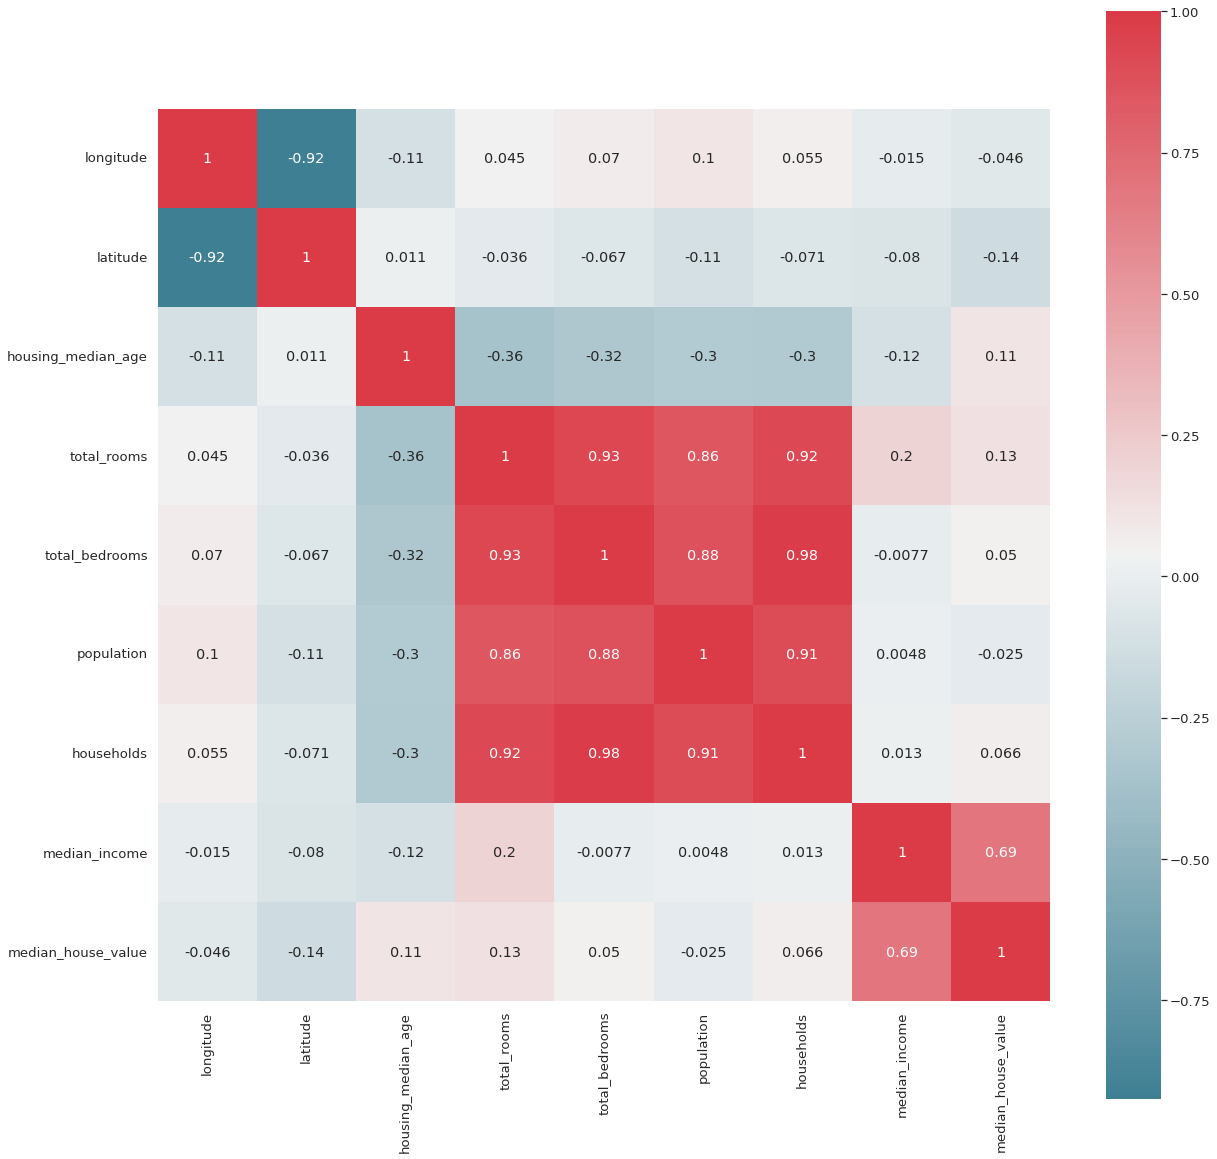

In [59]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

In [60]:
#count how many null values in each column
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

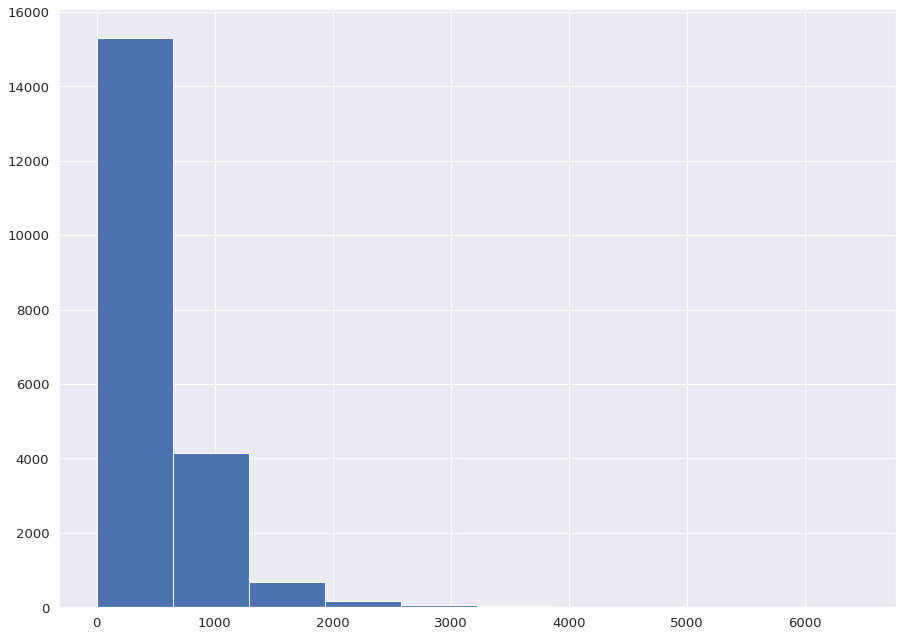

In [61]:
df.total_bedrooms.hist();

In [62]:
#Fill with median not mean since it is right skewed
df.total_bedrooms.fillna(df.total_bedrooms.median(), inplace=True)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [63]:
#check missing values. We are done!
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

# 3. Exploratory Data Visualization/Analysis

In [64]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

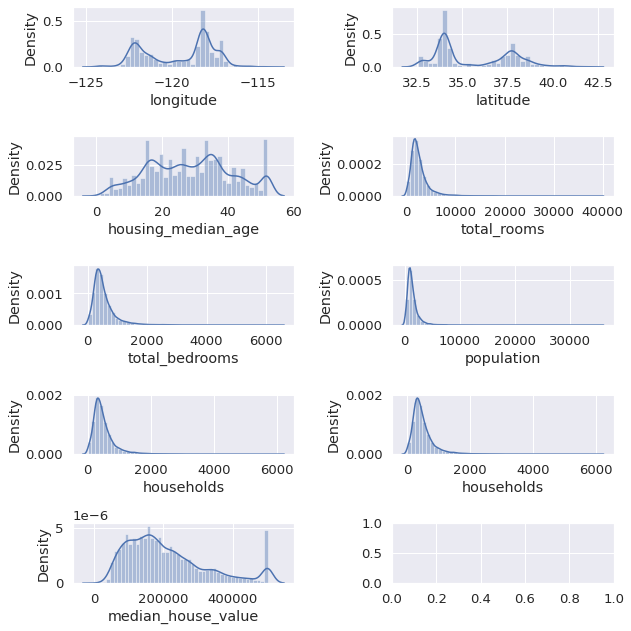

In [65]:
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['longitude'], ax = ax[0,0]) 
sns.distplot(df['latitude'], ax = ax[0,1]) 
sns.distplot(df['housing_median_age'], ax = ax[1,0]) 
sns.distplot(df['total_rooms'], ax = ax[1,1]) 
sns.distplot(df['total_bedrooms'], ax = ax[2,0]) 
sns.distplot(df['population'], ax = ax[2,1]) 
sns.distplot(df['households'], ax = ax[3,0]) 
sns.distplot(df['households'], ax = ax[3,1]) 
sns.distplot(df['median_house_value'], ax = ax[4,0]) 
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


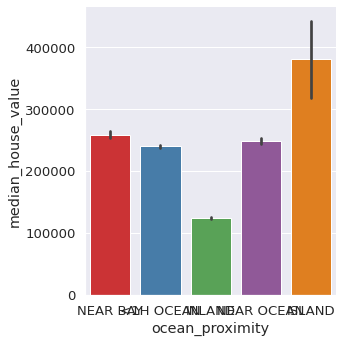

In [66]:
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.2)
sns.factorplot(x = 'ocean_proximity', y='median_house_value', kind = 'bar', data=df, palette="Set1")

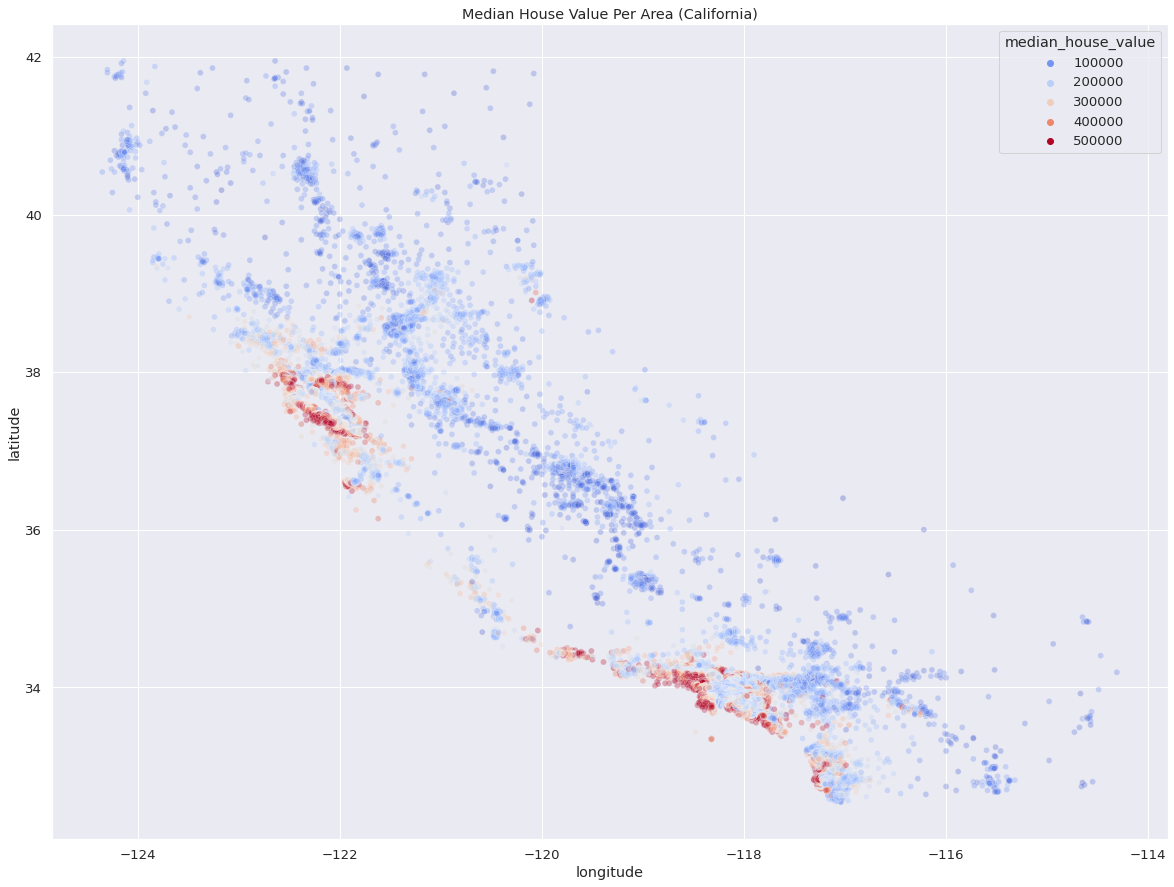

In [67]:
#The location of the household is an important factor in its price, we can see that areas closer to the bay have a higher median price.
sns.set(rc={'figure.figsize': [20, 15]}, font_scale=1.2)
ax = sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value', palette='coolwarm', alpha=0.3);
ax.set_title("Median House Value Per Area (California)");

# 4. Correlations

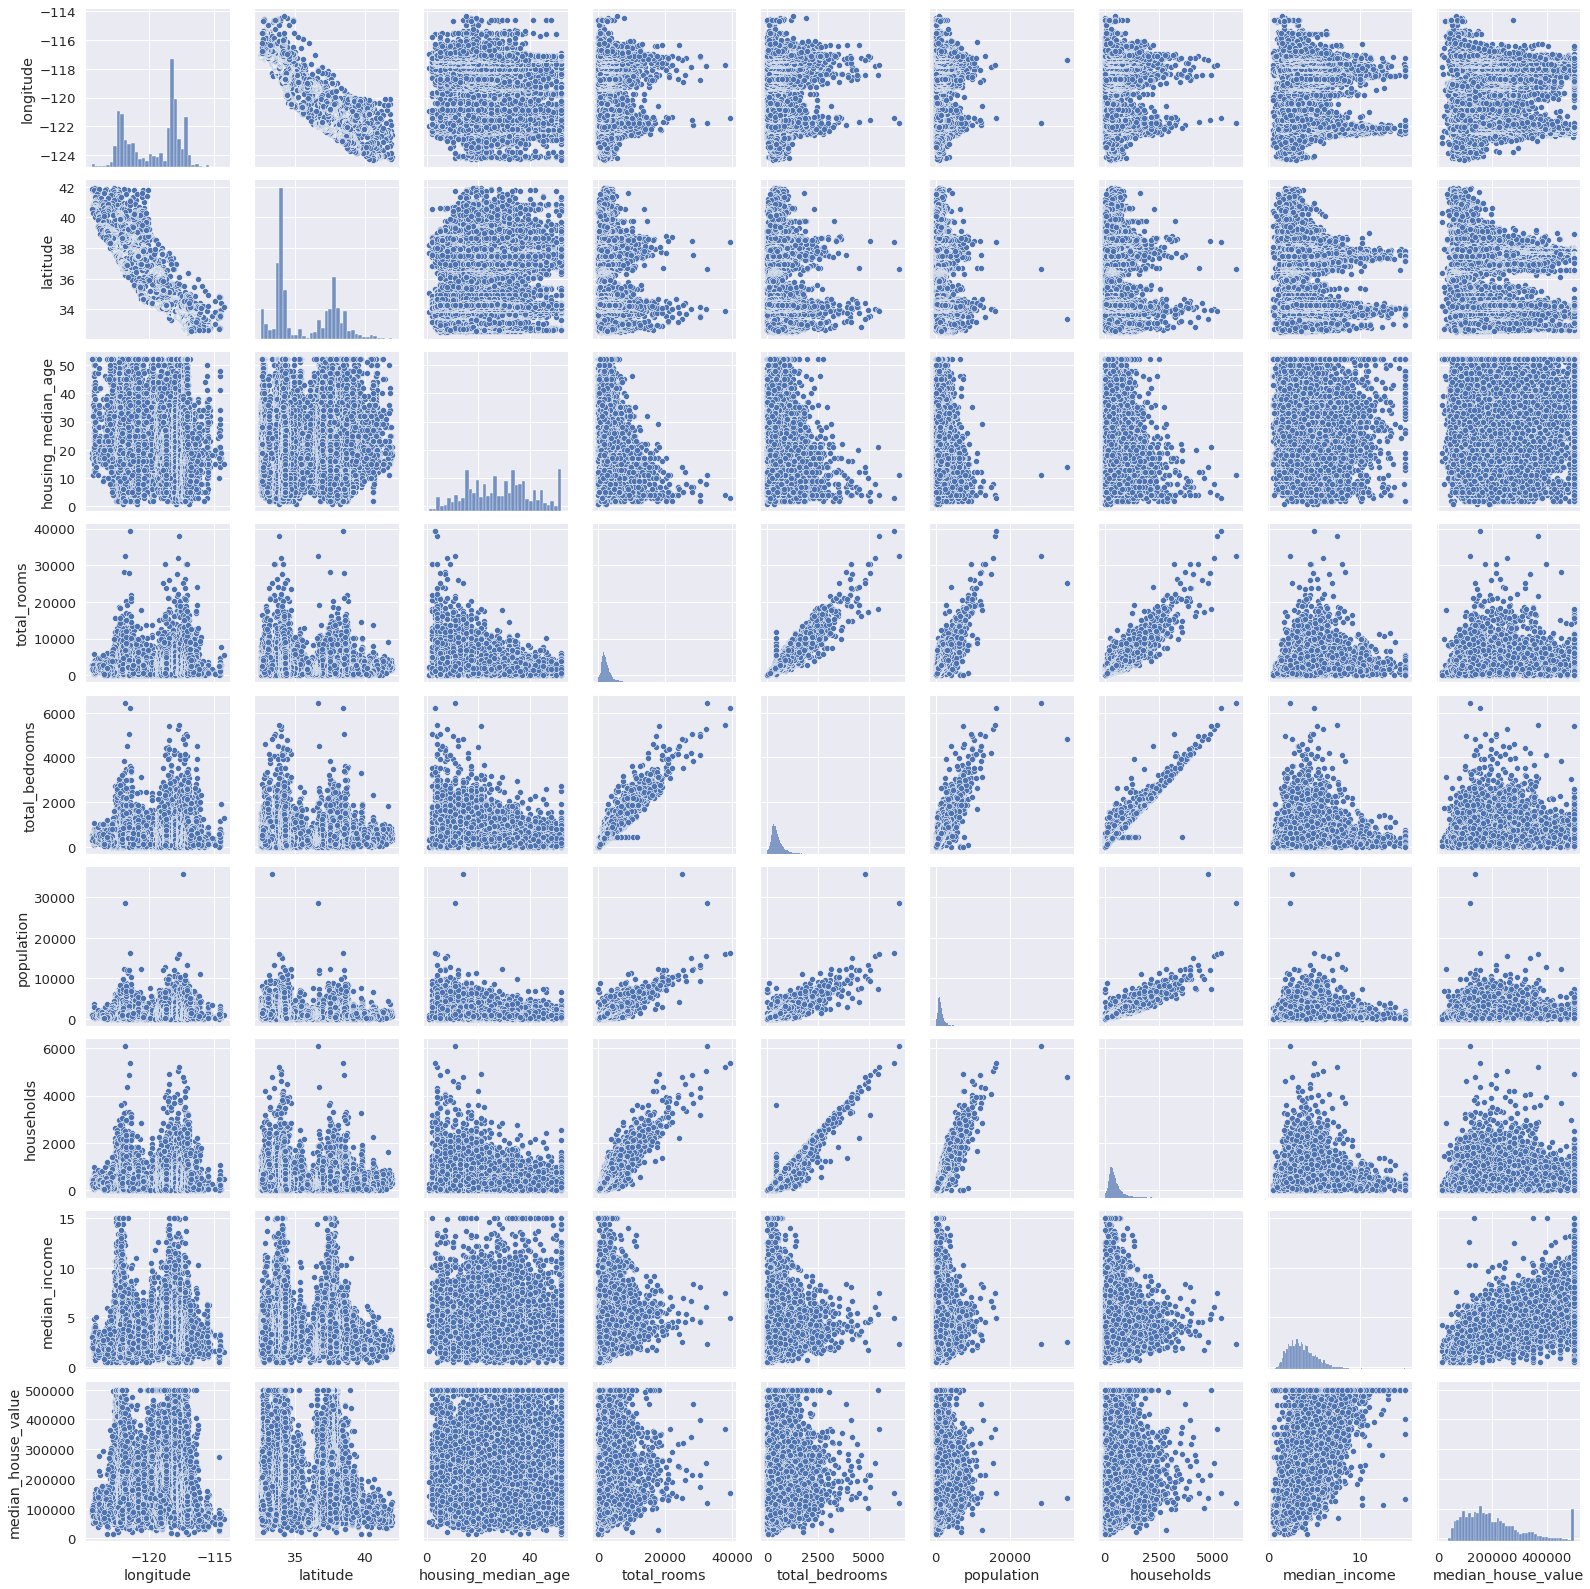

In [68]:
sns.pairplot(data=df)

# 5. Preprocessing

#### MISSING VALUES

In [69]:
#filter out those rows with does not contain any data
df=df.dropna(how='all')

#### Outliers

In [70]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:xlabel='longitude'>

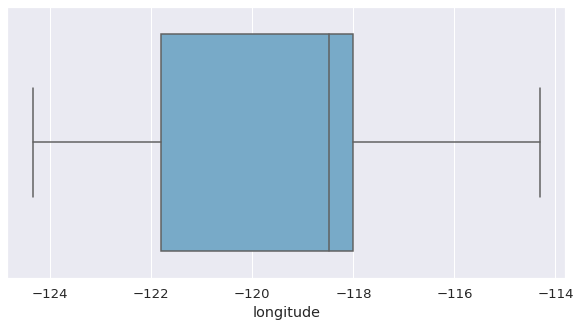

In [71]:
sns.set(rc={'figure.figsize': [10, 5]}, font_scale=1.2)
sns.boxplot(data=df,x="longitude", palette="Blues")

<AxesSubplot:xlabel='latitude'>

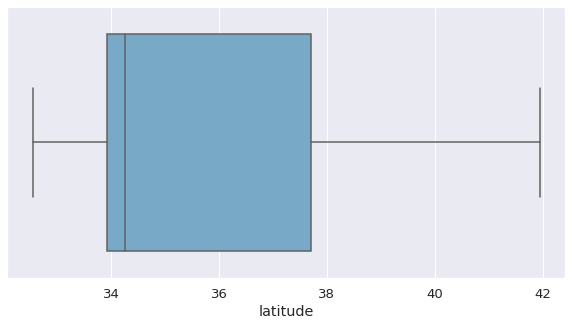

In [72]:
sns.boxplot(data=df,x="latitude", palette="Blues")

<AxesSubplot:xlabel='housing_median_age'>

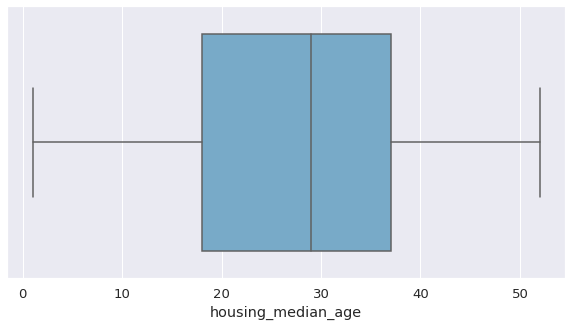

In [73]:
sns.boxplot(data=df,x="housing_median_age", palette="Blues")

<AxesSubplot:xlabel='total_rooms'>

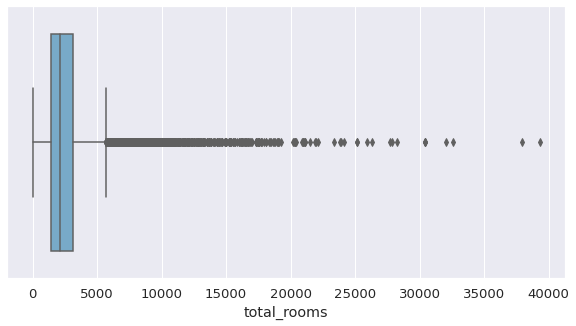

In [74]:
sns.boxplot(data=df,x="total_rooms", palette="Blues")

<AxesSubplot:xlabel='total_bedrooms'>

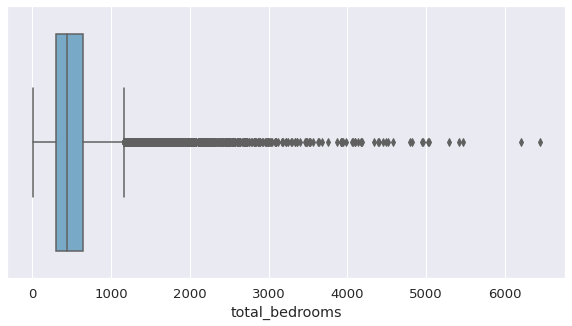

In [75]:
sns.boxplot(data=df,x="total_bedrooms", palette="Blues")

<AxesSubplot:xlabel='population'>

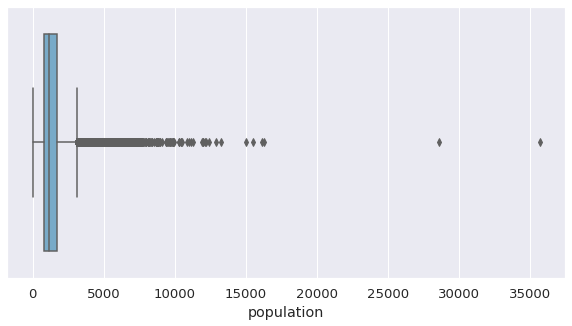

In [76]:
sns.boxplot(data=df,x="population", palette="Blues")

<AxesSubplot:xlabel='households'>

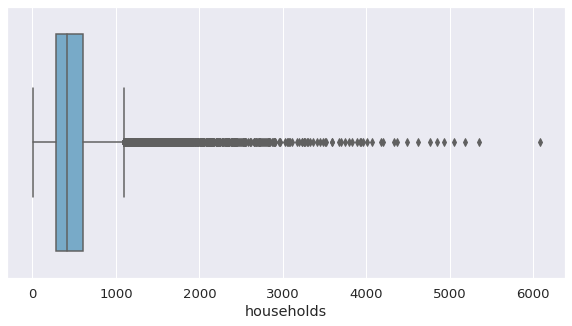

In [77]:
sns.boxplot(data=df,x="households", palette="Blues")

<AxesSubplot:xlabel='median_income'>

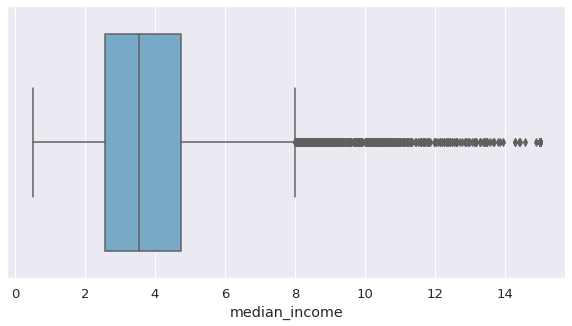

In [78]:
sns.boxplot(data=df,x="median_income", palette="Blues")

<AxesSubplot:xlabel='median_house_value'>

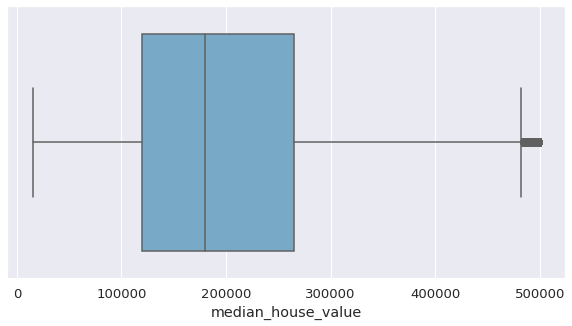

In [79]:
sns.boxplot(data=df,x="median_house_value", palette="Blues")

In [80]:
import datasist as ds
from datasist.structdata import detect_outliers

In [81]:
outlier= detect_outliers(df,0,[ 'total_rooms', 'total_bedrooms',"population","households","median_income","median_house_value"])
len(outlier)
df.drop(outlier,inplace=True)

In [82]:
df.shape

(17609, 10)

#### Binarise Ocean Proximity

In [83]:
le = LabelEncoder()
df.ocean_proximity = le.fit_transform(df.ocean_proximity)

#### Multicollinearity

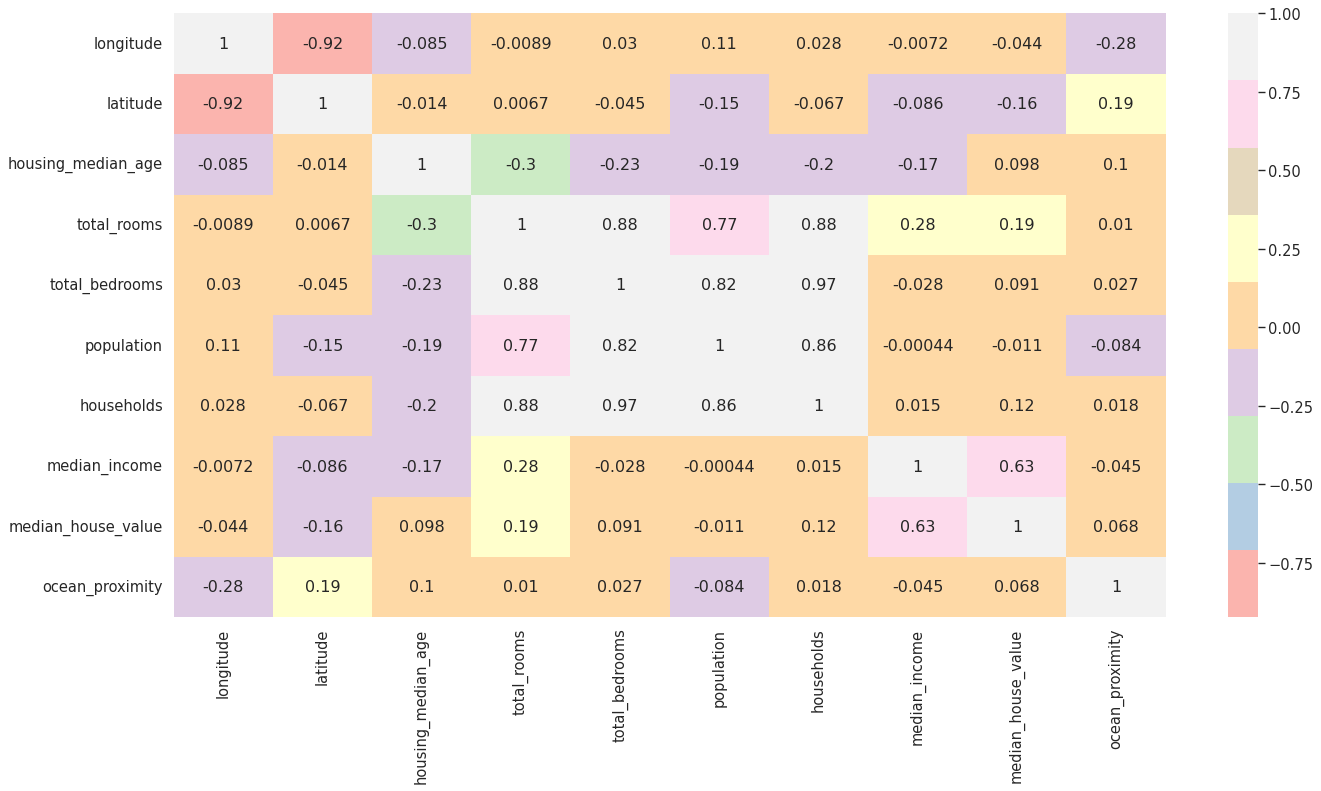

In [84]:
plt.figure(figsize=(20, 10), dpi=80)
sns.heatmap(df.corr(), cmap="Pastel1", annot=True);

# 6. Preparing Dataset

#### Splitting the dataset

In [85]:
x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=123)

#### Feature Scaling 

In [87]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# 7. Modelling

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [89]:
LR = LinearRegression()
LR.fit(x_train, y_train)
print(f"Training R2 score = {LR.score(x_train, y_train)}")
print(f"Test R2 score = {LR.score(x_test, y_test)}")

Training R2 score = 0.6098381686877906
Test R2 score = 0.6147515486210968


## VIF

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [91]:
XVIF = add_constant(df) # add the intercept to the columns
VIF = pd.Series([variance_inflation_factor(XVIF.values, i) for i in range(XVIF.shape[1])], index=XVIF.columns)
VIF

const                 21662.025654
longitude                11.500703
latitude                 11.895704
housing_median_age        1.269271
total_rooms               9.665477
total_bedrooms           19.683163
population                4.718458
households               21.324701
median_income             3.212248
median_house_value        2.569772
ocean_proximity           1.180407
dtype: float64

In [92]:
X1 = df.drop(columns=['longitude'])

x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=123)

In [93]:
LR = LinearRegression()
LR.fit(x_train, y_train)

print(f"Training R2 score = {LR.score(x_train, y_train)}")
print(f"Test R2 score = {LR.score(x_train, y_train)}")

Training R2 score = 1.0
Test R2 score = 1.0


## Lasso

In [94]:
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=123)
LR = Lasso()
LR.fit(x_train, y_train)

print(f"Training R2 score = {LR.score(x_train, y_train)}")
print(f"Test R2 score = {LR.score(x_train, y_train)}")

Training R2 score = 0.9999999999997957
Test R2 score = 0.9999999999997957


## Ridge

In [95]:
LR = Ridge()
LR.fit(x_train, y_train)
print(f"Training R2 score = {LR.score(x_train, y_train)}")
print(f"Test R2 score = {LR.score(x_test, y_test)}")

Training R2 score = 1.0
Test R2 score = 1.0


# 8. Evaluation

In [96]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)


ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

In [97]:
def get_metrics(p, y, y_pred):
    n = len(y)
    r2 = r2_score(y, y_pred)
    adjusted_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
    mae = mean_absolute_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, adjusted_r2, mae, mape, mse

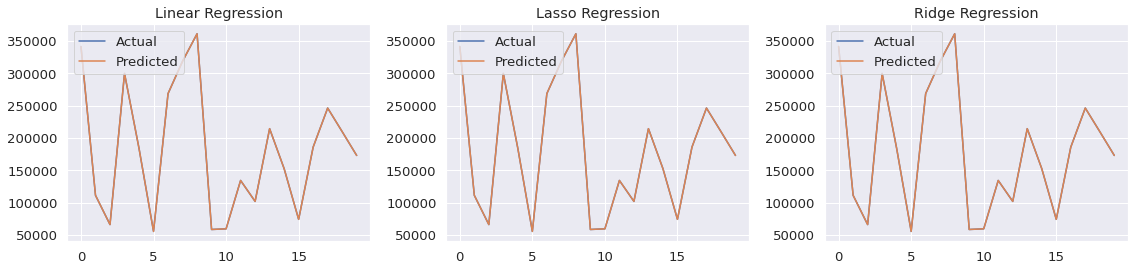

In [98]:
figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
axes[0].plot(df[:20]);
axes[0].set_title("Linear Regression");
axes[0].legend(["Actual", "Predicted"], loc="upper left")

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso}).reset_index(drop=True)
axes[1].plot(df[:20]);
axes[1].set_title("Lasso Regression");
axes[1].legend(["Actual", "Predicted"], loc="upper left")

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge}).reset_index(drop=True)
axes[2].plot(df[:20]);
axes[2].set_title("Ridge Regression");
axes[2].legend(["Actual", "Predicted"], loc="upper left")

plt.tight_layout()

In [99]:
p = x_train.shape[1]
pd.DataFrame([
              get_metrics(p, y_test, y_pred),
              get_metrics(p, y_test, y_pred_lasso),
              get_metrics(p, y_test, y_pred_ridge)
             ], 
    columns=['R2', 'Adjusted R2', 'MAE', 'MAPE', 'MSE'],
    index=['Linear Regression', 'Lasso Regression', 'Ridge Regression'])

,R2,Adjusted R2,MAE,MAPE,MSE
Linear Regression,1.0,1.0,3.980843e-11,3.330102e-16,2.503298e-21
Lasso Regression,1.0,1.0,3.069763e-02,2.203831e-07,1.762487e-03
Ridge Regression,1.0,1.0,9.534207e-10,6.268773e-15,1.558099e-18
